<a href="https://colab.research.google.com/github/saifulislamsaaif/Hyperledger-v1-testing/blob/master/DM22_C1_Report_a22mdsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# Import the numpy and pandas package
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')


# Task 1: Basic statistics


### Prepare data

In [92]:
# initialize list of lists
data = [[7.8, 32.1], [7.3, 32.6], [2.7, 37.4], [2.0, 38.3], [2.9, 37.3], [3.7, 36.5], [4.1, 36.1], [
    4.3, 35.8], [4.4, 35.7], [4.3, 35.7], [5.7, 34.4], [4.6, 35.5], [7.5, 32.4], [9.6, 30.2]]

# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Outdoor_temp Xi', 'Supply_temp Yi'])


### Questions 1: Estimate the mean of x and y

In [93]:
# mean of x and y.
x_bar = df.mean()['Outdoor_temp Xi']
y_bar = df.mean()['Supply_temp Yi']

# The mean of x and y.
print("The mean of x : ", x_bar)

# The mean of x and y.
print("The mean of y : ", y_bar)


The mean of x :  5.064285714285714
The mean of y :  34.99999999999999


### 2. Calculate the covariance of x and y

Text(0, 0.5, 'Supply_temp Yi')

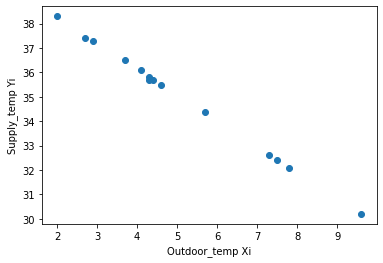

In [94]:
plt.scatter(df['Outdoor_temp Xi'], df['Supply_temp Yi'])
plt.xlabel('Outdoor_temp Xi')
plt.ylabel('Supply_temp Yi')


There seems to be a trend between x and y — as x increases, y decreases. So that means, x and y have a negative covariance. 
A negative covariance indicates that both variables tend to move away from each other — when one moves upward the other moves downward, and vice versa.

Mathematically, the formula for covariance is defined as follows:
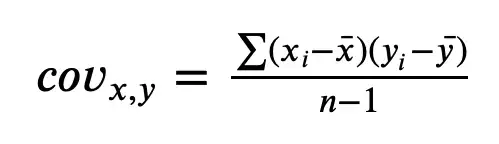

Covariance between 2 random variables is calculated by taking the product of the difference between the value of each random variable and its mean, summing all the products, and finally dividing it by the number of values in the dataset.

In [95]:
# covariance for x and y
((df['Outdoor_temp Xi'] - x_bar) *
 (df['Supply_temp Yi'] - y_bar)).sum() / (df.shape[0] - 1)


-5.192307692307692

### 3. Write an implementation with comments to calculate all results

Using the provided data to calculate all statistical results and fill the table

In [96]:
# (yi-ȳ)
df = df.assign(y_y_bar=lambda y: (y['Supply_temp Yi'] - y_bar))
# (xi- x̄)
df = df.assign(x_x_bar=lambda x: (x['Outdoor_temp Xi'] - x_bar))
# (yi-ȳ)²
df = df.assign(y_y_bar2=lambda y: (y['y_y_bar'] * y['y_y_bar']))
# (x-x)²
df = df.assign(x_x_bar2=lambda x: (x['x_x_bar'] * x['x_x_bar']))
# (yi-ȳ) * (xi- x̄)
df = df.assign(y_y_bar_multiply_x_x_bar=lambda xy: (
    xy['y_y_bar'] * xy['x_x_bar']))
df


,Outdoor_temp Xi,Supply_temp Yi,y_y_bar,x_x_bar,y_y_bar2,x_x_bar2,y_y_bar_multiply_x_x_bar
0,7.8,32.1,-2.9,2.735714,8.41,7.484133,-7.933571
1,7.3,32.6,-2.4,2.235714,5.76,4.998418,-5.365714
2,2.7,37.4,2.4,-2.364286,5.76,5.589847,-5.674286
3,2.0,38.3,3.3,-3.064286,10.89,9.389847,-10.112143
4,2.9,37.3,2.3,-2.164286,5.29,4.684133,-4.977857
5,3.7,36.5,1.5,-1.364286,2.25,1.861276,-2.046429
6,4.1,36.1,1.1,-0.964286,1.21,0.929847,-1.060714
7,4.3,35.8,0.8,-0.764286,0.64,0.584133,-0.611429
8,4.4,35.7,0.7,-0.664286,0.49,0.441276,-0.465000
9,4.3,35.7,0.7,-0.764286,0.49,0.584133,-0.535000


# Task 2: Linear Regression

### Load data set

In [97]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/Advertising.csv"


'/content/drive/My Drive/Colab Notebooks/Advertising.csv'


In [99]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Advertising.csv")


### Explore data

In [100]:
print("Size of the data:", df.shape)


Size of the data: (200, 4)


Advertising.csv Data set has 200 rows and 4 columns.

In [101]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


All are numeric column. Not categorical column are present.

The advertising dataset collects sales revenue earned by advertisement spends across different channels such as radio, television, and newspapers.

**Predictors**
* TV - Expenses on TV Advertisements
* Radio - Expenses on radio Advertisements
* Newspaper - Expenses on newspaper Advertisements

**Target Variable**
* Sales - Sales revenue generated

In [102]:
df.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


The Sales column is the dependent variable that we will utilize to build the model.

In [103]:
# Get summary of statistics of the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### Checking missing and duplicate value




In [104]:
df.isnull().values.any()


False

In [105]:
df.isna().any()


TV           False
radio        False
newspaper    False
sales        False
dtype: bool

In [106]:
df.isnull().sum()
# df.isnull().sum() * 100 / df.shape[0]


TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no any missing value present in this data set.
In the case of regression, we must ensure that the data contains no null values, as regression would fail if any of the data contains null values.

In [107]:
df.duplicated().sum()


0

There is no duplicate value.

###  Outlier analysis

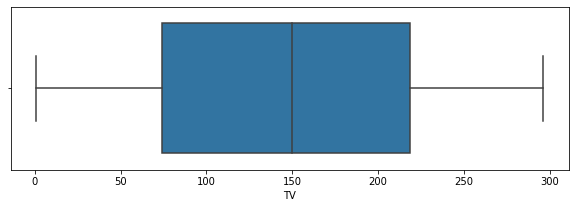

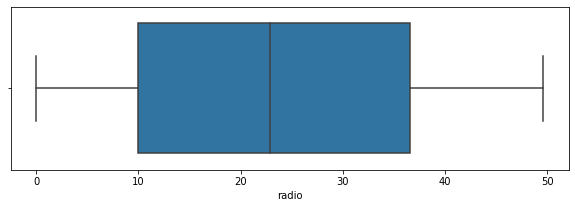

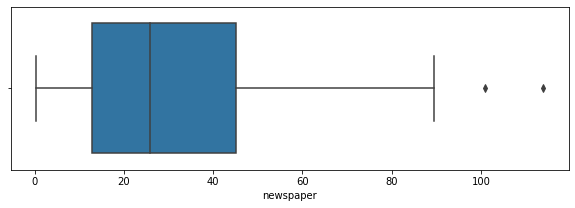

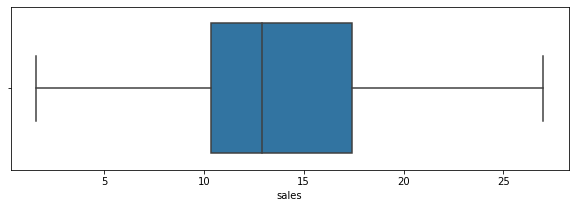

In [108]:
for i in df:
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[i])
    plt.show()


No such outliers observed.

### Correlations

When developing a model, it is critical to analyze correlations. The link between the independent and dependent variables must be understood. To accomplish this, we will create a heatmap that depicts how the dataset's columns relate to one another.

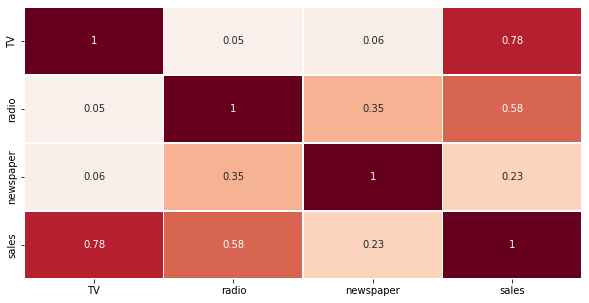

In [109]:
# Get Correlation of features
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(round(corr, 2), cmap='RdBu_r', linewidths=.5, annot=True,  center=0,
            cbar=False)
plt.show()


TV is the most correlated feature with Sales.

Let's use a scatter plot to examine the relationships between Sales and other variables.

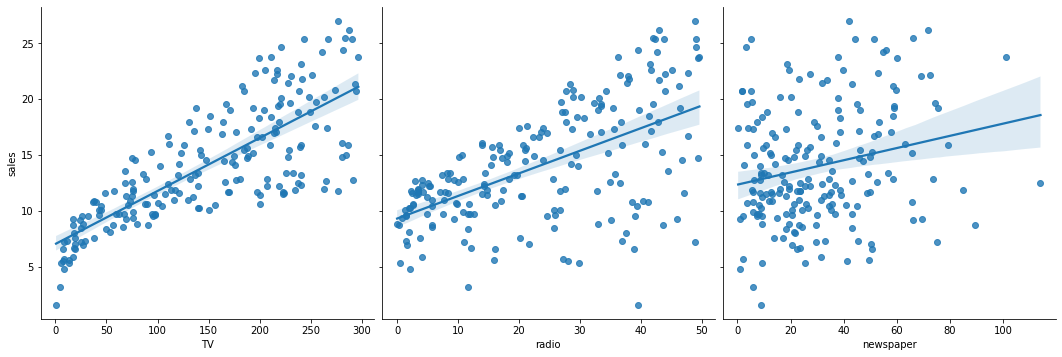

In [110]:
# sns.lmplot(x='TV',y='sales',data=df)
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'],
             y_vars='sales', size=5, kind='reg')


According to the above pair plot, TV is highly positively correlated with sales, and radio is also positively correlated with sales, but not as much as TV. Finally, the newspaper had a weak correlation with sales. TV and radio are more important than newspapers for predicting sales.


### Labels and features

In [111]:
indenpndentTV = df[['TV']].to_numpy()
indenpndentRadio = df[['radio']].to_numpy()
indenpndentPaper = df[['newspaper']].to_numpy()
indenpndennts = df.drop(['sales'], axis=1).to_numpy()
dependent = df['sales'].to_numpy()


In [112]:
# indenpndentTV


### Creating Univariate Linear Regression for TV

In [113]:
modelForTV = linear_model.LinearRegression()
modelForTV.fit(indenpndentTV, dependent)

coefOfTV = modelForTV.coef_
interceptOfTV = modelForTV.intercept_

print('coef = ', round(coefOfTV[0], 2))
print('intercept = ', round(interceptOfTV, 2))


coef =  0.05
intercept =  7.03


### Creating Univariate Linear Regression for Radio

In [114]:
modelForRadio = linear_model.LinearRegression()
modelForRadio.fit(indenpndentRadio, dependent)

coefOfRadio = modelForRadio.coef_
interceptOfRadio = modelForRadio.intercept_

print('coef = ', round(coefOfRadio[0], 2))
print('intercept = ', round(interceptOfRadio, 2))


coef =  0.2
intercept =  9.31


### Creating Univariate Linear Regression for Newspaper

In [115]:
modelForPaper = linear_model.LinearRegression()
modelForPaper.fit(indenpndentPaper, dependent)

coefOfPaper = modelForPaper.coef_
interceptOfPaper = modelForPaper.intercept_

print('coef = ', round(coefOfPaper[0], 2))
print('intercept = ', round(interceptOfPaper, 2))


coef =  0.05
intercept =  12.35


### Question 1 : What is the error when the advertisement for TV is 286.0?

In [116]:
dfForTV = df.loc[(df.TV == 286.0) | (df.TV == 286)]
dfForTV


,TV,radio,newspaper,sales
189,286.0,13.9,3.7,15.9


In [117]:
#actualSalesForTV = df.values[df['TV'] == 286, 3]
actualSalesForTV = dfForTV['sales'].to_numpy()
actualSalesForTV


array([15.9])

In [118]:
# tv = df.values[df['TV'] == 286, 0:1]
tv = dfForTV[['TV']].to_numpy()
tv


array([[286.]])

In [119]:
errorForTV = actualSalesForTV - modelForTV.predict(tv)
errorForTV
print("When the advertisement for TV is 286.0 then the error is : " +
      str(round(errorForTV[0], 2)))


When the advertisement for TV is 286.0 then the error is : -4.73


### Question 2 : Find the total Error between the regression line and data points for TV.

In [120]:
predictedResultForTV = modelForTV.predict(indenpndentTV)
print("Total Error MSE: ", round(
    metrics.mean_squared_error(dependent, predictedResultForTV), 2))


Total Error MSE:  10.51


### Linear regression model for sales if the advertisement is considered TV only.

Equation of univariate linear regression.

    y = c + m1×TV
Here, m values are called the model coefficients or model parameters.

In [121]:
print('Regression equation for Sales if the advertisement is considered TV only = ' +
      str(round(interceptOfTV, 2)) + ' + (' + str(round(coefOfTV[0], 2)) + ') * TV')


Regression equation for Sales if the advertisement is considered TV only = 7.03 + (0.05) * TV


### Question 3: Linear regression model for sales if the advertisement is considered Radio only.

Equation of univariate linear regression.

    y = c + m1×Radio
Here, m values are called the model coefficients or model parameters.

In [122]:
print('Regression equation for Sales if the advertisement is considered Radio only = ' +
      str(round(interceptOfRadio, 2)) + ' + (' + str(round(coefOfRadio[0], 2)) + ') * Radio')


Regression equation for Sales if the advertisement is considered Radio only = 9.31 + (0.2) * Radio


Linear regression model for sales if the advertisement is considered Radio only.


### Linear regression model for sales if the advertisement is considered Newspaper only.

Equation of univariate linear regression.

    y = c + m1×Newspaper
Here, m values are called the model coefficients or model parameters.

In [123]:
print('Regression equation for Sales if the advertisement is considered Newspaper only = ' +
      str(round(interceptOfPaper, 2)) + ' + (' + str(round(coefOfPaper[0], 2)) + ') * Newspaper')


Regression equation for Sales if the advertisement is considered Newspaper only = 12.35 + (0.05) * Newspaper


### Question 4: What is the error when the advertisement for radio is 13.9?

In [124]:
dfForRadio = df.loc[(df.radio == 13.9)]
dfForRadio


,TV,radio,newspaper,sales
151,280.7,13.9,37.0,16.1
189,286.0,13.9,3.7,15.9


In [125]:
#actualSalesForRadio = df.values[df['radio'] == 13.9, 3]
actualSalesForRadio = dfForRadio[['sales']].to_numpy()
actualSalesForRadio


array([[16.1],
       [15.9]])

In [126]:
radio = df.values[df['radio'] == 13.9, 1:2]
#radio = dfForRadio[['radio']].to_numpy()
radio


array([[13.9],
       [13.9]])

In [127]:
errorForRadio = actualSalesForRadio - modelForRadio.predict(radio)
print("When the advertisement for Radio is 13.9 then the error is : " +
      str(errorForRadio))


When the advertisement for Radio is 13.9 then the error is : [[3.97367052 3.97367052]
 [3.77367052 3.77367052]]


### Question 5: Find the total Error between the regression line and data points for Radio.

In [128]:
predictedResultForRadio = modelForRadio.predict(indenpndentRadio)
print("Total Error MSE: ", metrics.mean_squared_error(
    dependent, predictedResultForRadio))


Total Error MSE:  18.09239774512544


### Question 6: Linear regression model for sales if the advertisement is considered Newspaper only.



In [129]:
print('Regression equation for Sales if the advertisement is considered Newspaper only= ' +
      str(coefOfPaper) + ' * Newspaper + ' + str(interceptOfPaper))


Regression equation for Sales if the advertisement is considered Newspaper only= [0.0546931] * Newspaper + 12.35140706927816


### Question 7: Creating Multivariate Linear Regression

Setting a variable Y equal to the "Sales" column and a variable X equal to the amounts spent on various advertisements (features).

In [130]:
X = df.drop(['sales'], axis=1)
# target variable
y = df['sales']


In [131]:
X


,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


Correlation between each variable.

In [132]:
X.corr()


,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


No very strong correlation is seen, hence no columns will be dropped.

In [133]:
multiModel = linear_model.LinearRegression()
multiModel.fit(X, y)

multiCoef = multiModel.coef_
multiIntercept = multiModel.intercept_

print('coef = ', multiCoef)
print('intercept = ', multiIntercept)


coef =  [ 0.04576465  0.18853002 -0.00103749]
intercept =  2.938889369459412


Equation of linear regression

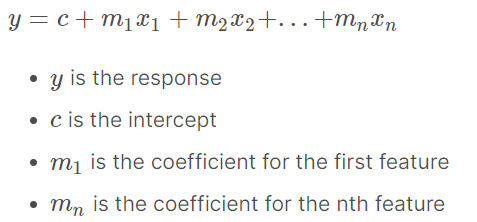



In [134]:
print('Regression equation - Sale = ' + str(round(multiIntercept, 3)) + ' + (' + str(round(multiCoef[0], 3)) + ') * TV + ('
      + str(round(multiCoef[1], 3)) + ') * Radio + (' +
      str(round(multiCoef[2], 3))
      + ') * Newspapper')


Regression equation - Sale = 2.939 + (0.046) * TV + (0.189) * Radio + (-0.001) * Newspapper


Split the dataset

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


By default it splits the given data into 75-25 ratio.

In [136]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(150, 3)
(150,)
(50, 3)
(50,)


Now build a multivariate linear regression with train data set

In [137]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

print('coef = ', lr.intercept_)
print('intercept = ', lr.coef_)


coef =  2.87696662231793
intercept =  [0.04656457 0.17915812 0.00345046]


Now predict with test data set.

In [138]:
y_pred = lr.predict(X_test)
print(y_pred)


[21.70910292 16.41055243  7.60955058 17.80769552 18.6146359  23.83573998
 16.32488681 13.43225536  9.17173403 17.333853   14.44479482  9.83511973
 17.18797614 16.73086831 15.05529391 15.61434433 12.42541574 17.17716376
 11.08827566 18.00537501  9.28438889 12.98458458  8.79950614 10.42382499
 11.3846456  14.98082512  9.78853268 19.39643187 18.18099936 17.12807566
 21.54670213 14.69809481 16.24641438 12.32114579 19.92422501 15.32498602
 13.88726522 10.03162255 20.93105915  7.44936831  3.64695761  7.22020178
  5.9962782  18.43381853  8.39408045 14.08371047 15.02195699 20.35836418
 20.57036347 19.60636679]


In [139]:
print("MAE:    ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE:    ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE:   ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE:     1.0668917082595213
MSE:     1.9730456202283373
RMSE:    1.404651423032895


Checking the R-squared on the test set

In [140]:
r_squared = metrics.r2_score(y_test, y_pred)
r_squared


0.9156213613792232

# Task 3: Clustering

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

### Load data set

Downlaod data set from http://lib.stat.cmu.edu/datasets/boston and import.

In [141]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Colab Notebooks/housing.csv"


'/content/drive/My Drive/Colab Notebooks/housing.csv'


In [143]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/housing.csv",
                 header=None, delimiter=r"\s+", names=column_names)


In [144]:
data = df


## Question 1: Explore the data

### EDA

#### Information

In [145]:
# See head of the dataset
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Each record in the database describes a Boston suburb or town.

In [146]:
print("Size of the data:", df.shape)


Size of the data: (506, 14)


There are 506 rows and 14 attributes (features).

In [147]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


All are numeric column.



In [148]:
# No.of Elements in the DataSet
print("No.of Elements in the DataSet : " + str(df.size))


No.of Elements in the DataSet : 7084


Identifying the unique number of values in the dataset

In [149]:
# checking number of unique values in each column
df.nunique()


CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

Here we can see that few variables (CHAS and RAD) are categorical but they are present in integer format.

#### Checking missing and duplicate value




In [150]:
df.isnull().values.any()


False

In [151]:
df.isna().any()


CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [152]:
df.isnull().sum()
# df.isnull().sum() * 100 / df.shape[0]


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is no any missing value present in this data set.

In [153]:
# Boolean Series denoting duplicate rows
df.duplicated().sum()


0

There is no duplicate value.

Series containing count of unique values.

In [154]:
df.value_counts()


CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS      RAD  TAX    PTRATIO  B       LSTAT  MEDV
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296.0  15.3     396.90  4.98   24.0    1
1.00245   0.0   8.14   0     0.538  6.674  87.3   4.2390   4    307.0  21.0     380.23  11.98  21.0    1
1.38799   0.0   8.14   0     0.538  5.950  82.0   3.9900   4    307.0  21.0     232.60  27.71  13.2    1
1.35472   0.0   8.14   0     0.538  6.072  100.0  4.1750   4    307.0  21.0     376.73  13.04  14.5    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5    403.0  14.7     353.89  6.43   24.3    1
                                                                                                      ..
0.11027   25.0  5.13   0     0.453  6.456  67.8   7.2255   8    284.0  19.7     396.90  6.73   22.2    1
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273.0  21.0     393.45  6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5

#### Statistics of the data

In [155]:
# Get summary of statistics of the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


For the CRIM (per capita crime rate by town) the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column.

ZN with 0 for 25th, 50th percentiles are zero.

CHAS with 0 for 25th, 50th and 75th percentiles are zero.

These summeries for above two columns are understandable as both variables are conditional + categorical variables.




####  Outlier analysis

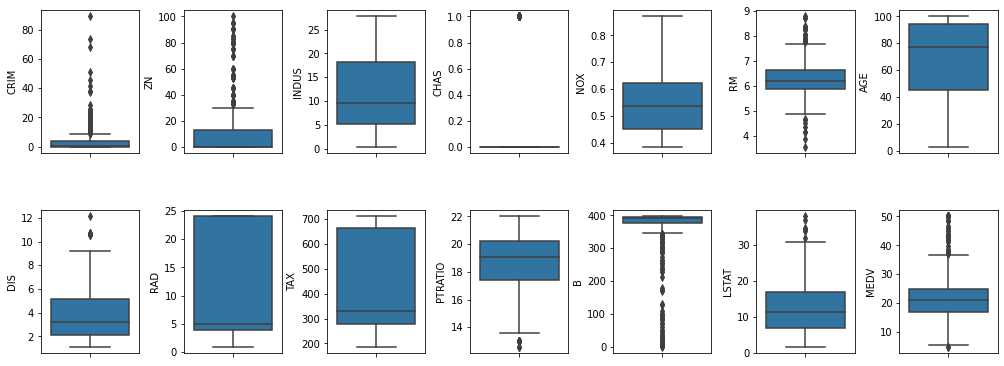

In [156]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(14, 5))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Columns like CRIM, ZN, RM, B, LSTAT and MEDV seems to have outliers. Let's see the outliers percentage in every column.

In [157]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))


Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Columns B, ZN and CRIM possess large amount of outliers than other features.

Removing MEDV outliers 

In [158]:
# restore data from backup (it is needed random run and check output)
df = data

In [159]:
# df[df['MEDV'] >= 50.0
df = df[~(df['MEDV'] >= 50.0)]
# df[df['MEDV'] >= 50.0]
# df
print("Size of the data:", df.shape)

Size of the data: (490, 14)


Now checking distributions.

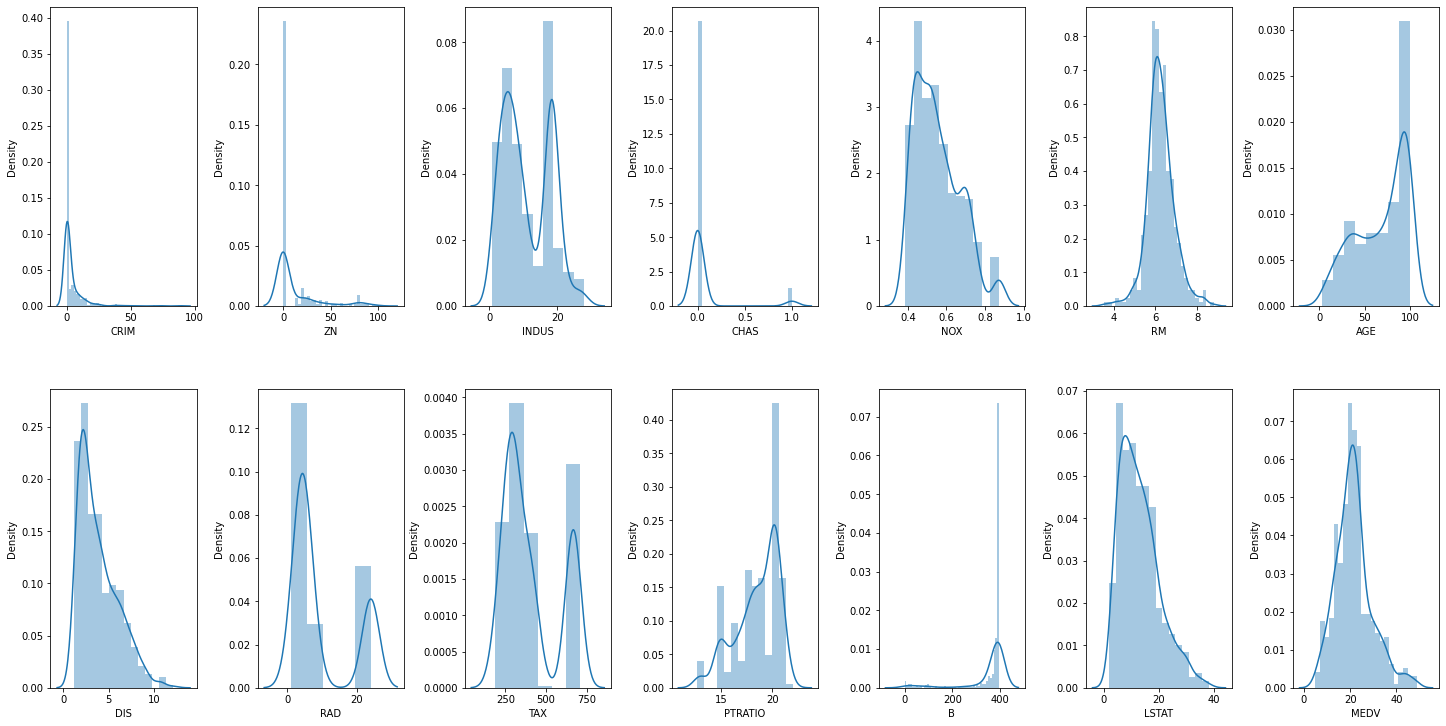

In [160]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


The histogram shows that columns CRIM, ZN, B has highly skewed distributions.

MEDV looks to have a normal distribution (the predictions).

CHAS is a discrete variable.

Other colums seem to have norma or bimodel ditribution

#### Correlations

In [161]:
# Get Correlation of features
corr = df.corr()
corr.shape


(14, 14)

Unstacking the correlation values to check the correlation between the feature columns

In [162]:
c1 = corr.abs().unstack()
c1.sort_values(ascending=False)[14:28:2]


RAD    TAX      0.909000
DIS    NOX      0.768122
NOX    INDUS    0.765155
LSTAT  MEDV     0.759837
AGE    DIS      0.743043
       NOX      0.727671
TAX    INDUS    0.717678
dtype: float64

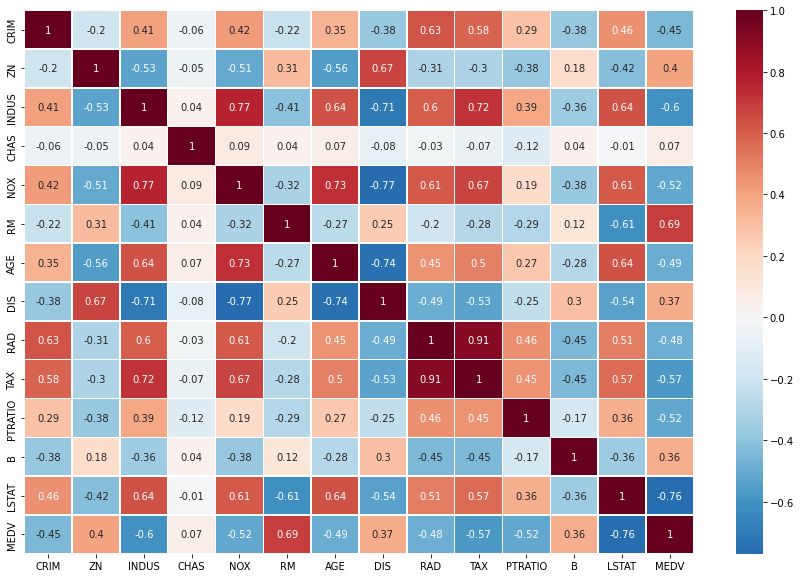

In [163]:
plt.figure(figsize=(15, 10))
sns.heatmap(round(corr, 2), cmap='RdBu_r', linewidths=.5, annot=True,  center=0,
            cbar=True,)
plt.show()


By looking at the correlation plot LSAT is negatively correlated with -0.74 and RM is positively correlated to the MEDV and PTRATIO is correlated negatively with -0.51 to the MEDV which is a good score to consider them for prediction.

TAX and RAD are highly correlated features.

Now plotting these columns against MEDV.

In [164]:
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()

column_sels = ['LSTAT', 'PTRATIO', 'INDUS', 'NOX', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:, column_sels]
y = data['MEDV']

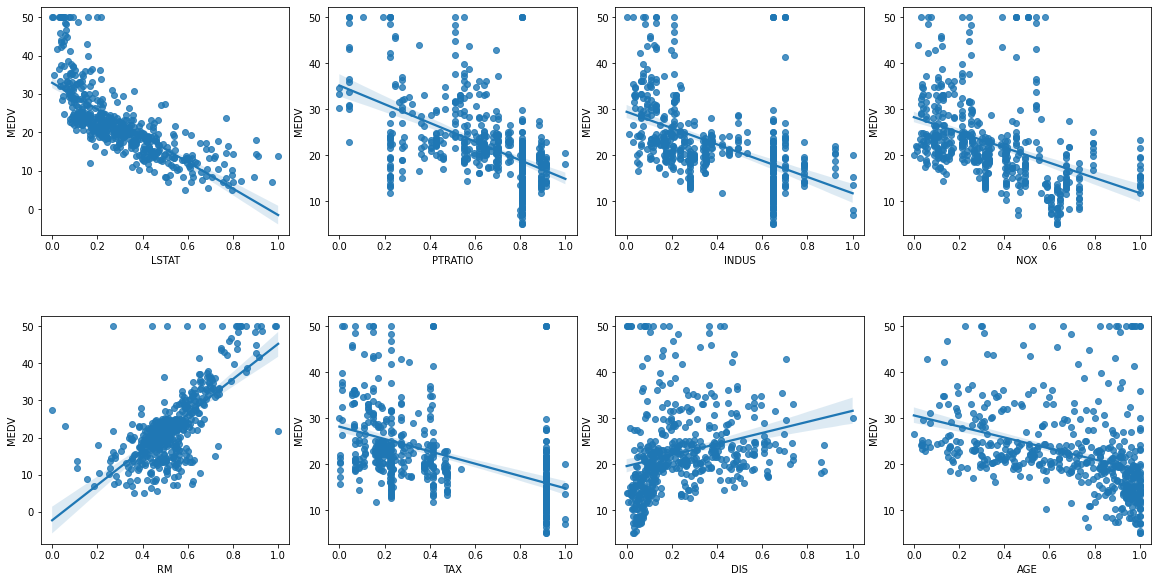

In [165]:
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(16, 8))

axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


# Question 2: 

## K- Mean clustering 

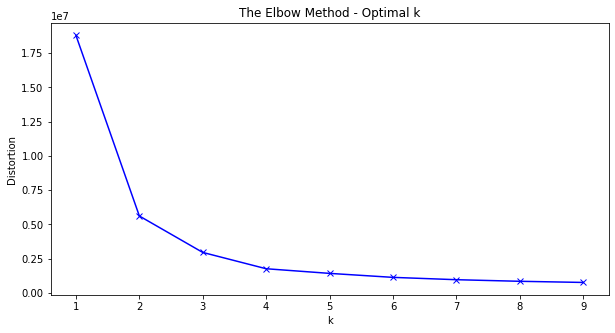

In [166]:
distortions = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters = k)
    km.fit(df)
    distortions.append(km.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method - Optimal k')
plt.show()

In [167]:
km = KMeans(n_clusters = 3)
km.fit(df)

# Getting clustering to variable.
km_clusters = km.predict(df)
# km_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

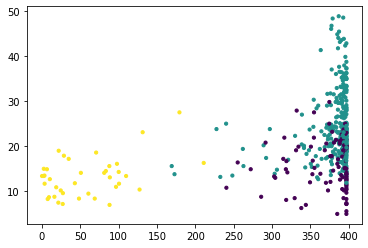

In [168]:
plt.scatter(df['B'], df['MEDV'], s=10, c=km_clusters)
plt.show()

## DBSCAN clustering

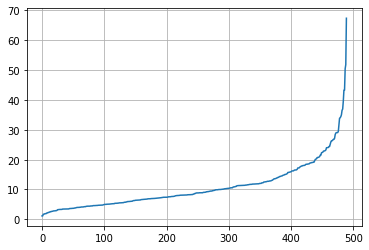

In [169]:
# finding optimal eps value
neighbors = NearestNeighbors(n_neighbors = 4)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.grid()
plt.plot(distances)
plt.show()


In [170]:
dbscan = DBSCAN(eps=21, min_samples=24).fit(df)

# Storing the labels formed by the DBSCAN
db_clusters = dbscan.labels_

# Calculating "the number of clusters"
n_clusters_ = len(set(db_clusters)) - (1 if -1 in db_clusters else 0)
print(n_clusters_)

2


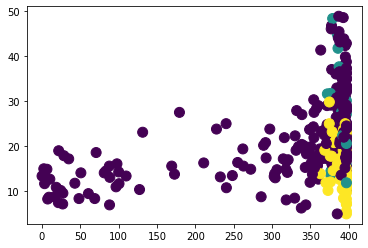

In [171]:
plt.scatter(df['B'], df['MEDV'], s=100, c=db_clusters)
plt.show()

## Hierarchical Clustering 

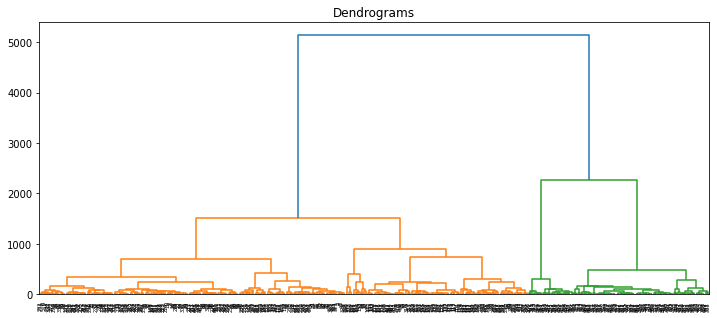

In [172]:
# Dendograms to find optimal # of clusters
plt.figure(figsize=(12, 5))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.show()

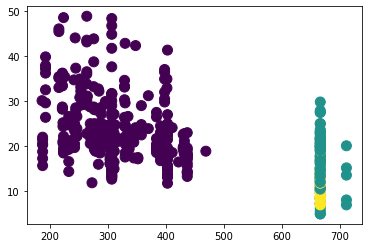

In [173]:
hierarchical = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')
hr_clusters = hierarchical.fit_predict(df)

plt.scatter(df['TAX'], df['MEDV'], s=100, c=hr_clusters)
plt.show()


##BIRCH clustering

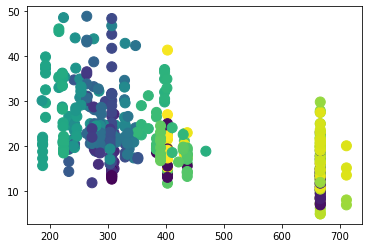

In [174]:
# Creating the BIRCH clustering model
model = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
# Fit the data
model.fit(df)
# Predict data
br_clusters = model.predict(df)

plt.scatter(df['TAX'], df['MEDV'], s=100, c=br_clusters)
plt.show()


# Question 3: Evaluation & Comparison

In [175]:
df_results = pd.DataFrame()
df_results['Algorithms'] = ['K-means', 'DBSCAN', 'Hierarchical', 'BRICH']

df_results['ARI'] = [metrics.adjusted_rand_score(df['MEDV'], km_clusters), metrics.adjusted_rand_score(
    df['MEDV'], db_clusters), metrics.adjusted_rand_score(df['MEDV'], hr_clusters), metrics.adjusted_rand_score(df['MEDV'], br_clusters)]

df_results['Silhouette'] = [metrics.silhouette_score(df.drop(['MEDV'], axis=1), km_clusters), metrics.silhouette_score(df.drop(['MEDV'], axis=1), db_clusters),
                            metrics.silhouette_score(df.drop(['MEDV'], axis=1), hr_clusters), metrics.silhouette_score(df.drop(['MEDV'], axis=1), br_clusters)]

df_results

,Algorithms,ARI,Silhouette
0,K-means,0.001698,0.723486
1,DBSCAN,-0.000142,-0.145031
2,Hierarchical,0.001741,0.720848
3,BRICH,-0.000180,0.022988
